# Sharpening

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
image = cv2.imread('input.jpg')
cv2.imshow('Original', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
kernel_sharpening = np.array([[-1,-1,-1],
                            [-1,9,-1],
                            [-1,-1,-1]])

sharpened = cv2.filter2D(image, -1, kernel_sharpening)
cv2.imshow('Image Sharpening', sharpened)


cv2.waitKey(0)
cv2.destroyAllWindows()

# Edge Detection & Image Gradient

In [ ]:
# Sobel
# Laplacian
# Canny

In [7]:
import numpy as np
import cv2

image = cv2.imread('input.jpg')
height, width = image.shape


# Extract Soble Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

cv2.imshow("Original", image)
cv2.waitKey(0)

cv2.imshow("Sobel X", sobel_x)
cv2.waitKey(0)

cv2.imshow("Sobel Y", sobel_y)
cv2.waitKey(0)

sobel_OR = cv2bitwise_or(sobel_x, sobel_y)
cv2.imshow("sobel_OR", sobel_OR)
cv2.waitKey(0)

# Laplacian

laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2.imshow("laplacian", laplacian)
cv2.waitKey(0)


# CANNY Method - best method
canny = cv2.Canny(image, 50, 120)
cv2.imshow("Canny", canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Live Edge Detection

In [8]:
import numpy as np
import cv2

# make sketch function

def sketch(image):
    # part 1 - convert image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # part 2 - clean up image using Guassian Blur
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)

    # part 3 - Extract Edge - canny
    canny_edge = cv2.Canny(img_gray_blur, 10, 70)

    # Part 4 - threshold value
    ret, mask = cv2.threshold(canny_edge, 70, 255, cv2.THRESH_BINARY_INV)
    return mask

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    cv2.imshow("Our Live Sketcher", sketch(frame))
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

# Thresholding, Binarization and Adaptive Threshold concept

In [25]:
import cv2

# Read the image
image = cv2.imread('Bird.jpg')

# Display the original image
cv2.imshow('Original', image)

# Threshold types
threshold_types = [
    cv2.THRESH_BINARY,
    cv2.THRESH_BINARY_INV,
    cv2.THRESH_TRUNC,
    cv2.THRESH_TOZERO,
    cv2.THRESH_TOZERO_INV
]

# Apply different threshold types and display the results
for i, threshold_type in enumerate(threshold_types, start=1):
    ret, thresh = cv2.threshold(image, 127, 255, threshold_type)
    cv2.imshow(f'{i} Threshold type', thresh)

# Wait for a key event and close windows
cv2.waitKey(0)
cv2.destroyAllWindows()


# Adaptive Threshold value

In [10]:
image = cv2.imread('Origin_of_Species.jpg', 0)
cv2.imshow('Original', image)
cv2.waitKey(0)

ret, thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1st Threshold type', thresh1)
cv2.waitKey(0)

# it's good practice to blue images as it removes noise

image = cv2.GaussianBlur(image, (3,3),0)

# Using adaptiveThreshold value
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,3,5 )
cv2.imshow("AdaptiveThreshold", thresh)
cv2.waitKey(0)


_, thresh2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('2nd THRESH_OTSU type', thresh2)
cv2.waitKey(0)

blur = cv2.GaussianBlur(image, (5,5),0)


_, thresh3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('GaussianBlur Threshold type', thresh3)
cv2.waitKey(0)

cv2.destroyAllWindows()

# Dilation and Erosion

In [ ]:
# Dilation : adds pixels to the boundaries of objects in an images
# Erosion : removes pixels to the boundaries of objects in an images
# Opening : Erosion followed by dilation
# Closing : Dilation followed by erosion

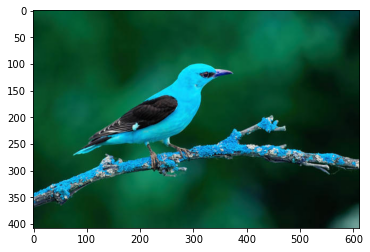

In [31]:
import cv2
import numpy as np

image = cv2.imread('Bird.jpg')
plt.imshow(image)

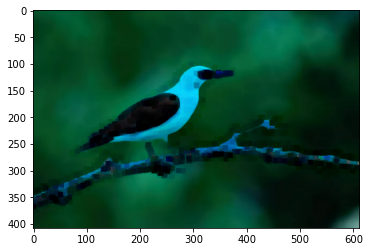

In [26]:
# Lets define our kernel size
kernel = np.ones((9,9))

# Now we erode
erosion = cv2.erode(image, kernel, iterations=1)
plt.imshow(erosion)

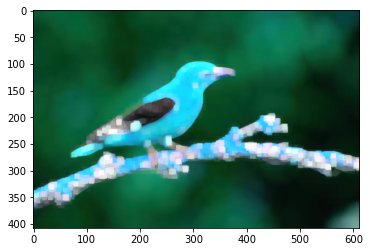

In [27]:
# dilation
dilation = cv2.dilate(image, kernel, iterations=1)
plt.imshow(dilation)
plt.show()

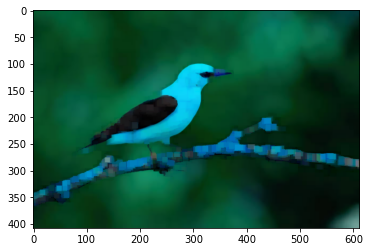

In [28]:
# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)
plt.show()

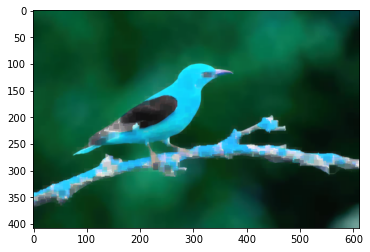

In [29]:
# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)